THE SPARK FOUNDATION
GRIPJUNE2024
TASK:1

NAME:SHIVANI GIRI ||
FIELD: DATA SCIENCE AND BUSINESS ANALYTICS

# LINEAR REGRESSION
Simple Linear Regression
In this regression task we will predict the percentage of marks that a student is expected to score based upon the number of hours they studied. This is a simple linear regression task as it involves just two variables (hours, scores).

In [138]:
#IMPORTING REQUIRED LIBRARIES IN THIS TASK
import pandas as pd
import numpy as np   
import seaborn as sns
from sklearn.model_selection import train_test_split  
from sklearn.linear_model import LinearRegression  
from sklearn import metrics
import matplotlib.pyplot as plt  
%matplotlib inline


In [139]:
#Reading data 
url="http://bit.ly/w-data"
data = pd.read_csv("http://bit.ly/w-data")
data.head() #head displays tops five values

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [140]:
#Information about dataset such as datatype 
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 532.0 bytes


In [141]:
data.isnull().sum()

Hours     0
Scores    0
dtype: int64

In [142]:
EDA=data.describe()
EDA

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


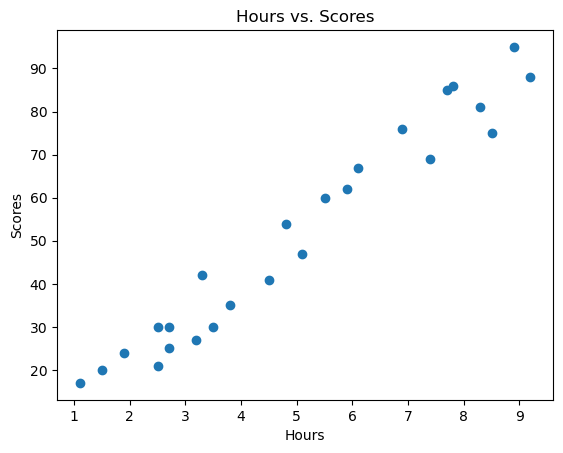

In [143]:
## Plot data and set labels
x = data['Hours']
y = data['Scores']
plt.scatter(x, y)
plt.title("Hours vs. Scores")
plt.xlabel('Hours')
plt.ylabel('Scores')
#show the plot
plt.show()

From the above graph we observe that there is linear relationship between the two variable.A positive linear relationship is represented by an upward line on a graph. It means that if one variable increases then the other variable increases. Conversely, a negative linear relationship would show a downward line on a graph. If one variable increases then the other variable decreases

Scatter plots' primary uses are to observe and show relationships between two numeric variables. 
The dots in a scatter plot not only report the values of individual data points, but also patterns when the data are taken as a whole.Identification of correlational relationships are common with scatter plots.

# Preparing the Data

#After exploring our data set, now will prepare our data for prediction 

In [144]:
#Step:1 We first assign the feature variable,'HOURS',during this case,to the variable `X` and the response variable,`Socres`,to the variable `y`.
#Attributes are the independent variables while labels are dependent variables whose values are to be predicted.
X = data['Hours'].values.reshape(-1,1)
Y = data['Scores'].values.reshape(-1,1)

#Other ways to do the same
X=data.iloc[:,0:1].values
Y=data.iloc[:,1:2].values
X = data.iloc[:, :-1].values  
y = data.iloc[:, 1].values 

In [145]:
#Step:2 And after assigning the variables we need to split our variable into training and testing sets.
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=0)


Here we are using 70% of our dataset for training and 30% of the data for testing.
The test_size variable is where we actually specify the proportion of the test set.

In [146]:
#Step:3 One can check the shapes of train and test sets 
print( X_train.shape )
print( X_test.shape )
print( Y_train.shape )
print( Y_test.shape )

(17, 1)
(8, 1)
(17, 1)
(8, 1)


In [147]:
#Step:4 Training the algorithm
regressor = LinearRegression()  
regressor.fit(X_train, Y_train) 

LinearRegression()

In [148]:
#To retrieve the intercept:
print(regressor.intercept_)
#For retrieving the slope:
print(regressor.coef_)

[2.37081538]
[[9.78856669]]


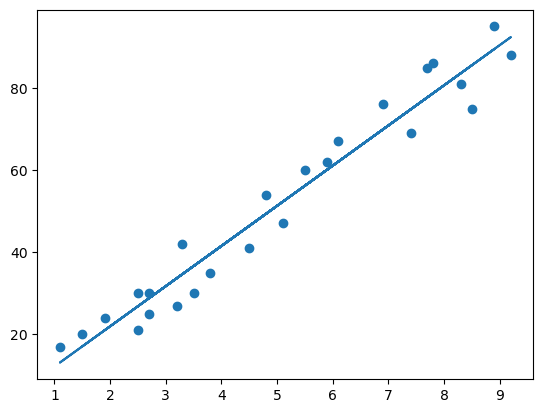

In [149]:
# Plotting the regression line
line = regressor.coef_*X+regressor.intercept_
# Plotting for the test data
plt.scatter(X, Y)
plt.plot(X, line);
plt.show()

In [150]:
#Step4: Making prediction
y_pred = regressor.predict(X_test)
y_pred

array([[17.05366541],
       [33.69422878],
       [74.80620886],
       [26.8422321 ],
       [60.12335883],
       [39.56736879],
       [20.96909209],
       [78.72163554]])

In [151]:
#Now comparing the actual output values for X_test with the predicted values
df = pd.DataFrame({'Actual': Y_test.flatten(), 'Predicted': y_pred.flatten()})
df 

,Actual,Predicted
0,20,17.053665
1,27,33.694229
2,69,74.806209
3,30,26.842232
4,62,60.123359
5,35,39.567369
6,24,20.969092
7,86,78.721636


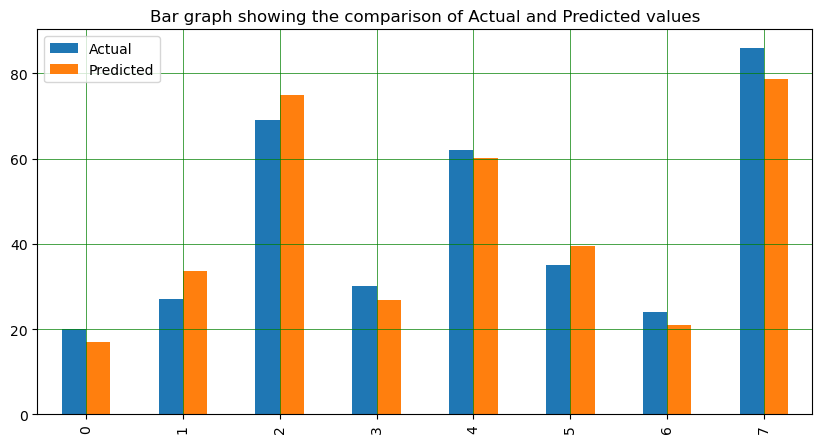

In [152]:
#We can also visualize comparison result as a bar graph 
df.plot(kind='bar',figsize=(10,5))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.title('Bar graph showing the comparison of Actual and Predicted values')
plt.show()

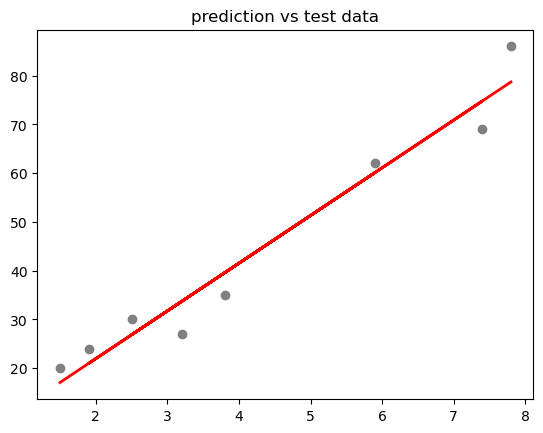

In [153]:
plt.scatter(X_test, Y_test,  color='gray')
plt.plot(X_test, y_pred, color='red', linewidth=2)
plt.title('prediction vs test data')
plt.show()

In [154]:
#Question in the task to predict scores for 9.25 hours
hours =np.array(9.25).reshape(-1,1)
own_pred = regressor.predict(hours)
print("No of Hours = {}".format(hours))
print("Predicted Score = {}".format(own_pred[0]))

No of Hours = [[9.25]]
Predicted Score = [92.91505723]


The final step is to evaluate the performance of the algorithm.This step is particularly important to compare how well different algorithms perform on a particular dataset.For regression algorithms, three evaluation metrics are commonly used are:
1.Mean Absolute Error (MAE) is the mean of the absolute value of the errors.
2.Mean Squared Error (MSE) is the mean of the squared errors 
3.Root Mean Squared Error (RMSE) is the square root of the mean of the squared errors

In [155]:
#Step5:
print('Mean Absolute Error:', metrics.mean_absolute_error(Y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(Y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(Y_test, y_pred)))


Mean Absolute Error: 4.419727808027651
Mean Squared Error: 22.965097212700428
Root Mean Squared Error: 4.7921912746363144


# Apart from `sklearn`, there is another package namely `statsmodels` that can be used to perform linear regression. 

In [156]:
import statsmodels.api as sm
# Add a constant to get an intercept
X_train_sm = sm.add_constant(X_train)
# Fit the resgression line using 'OLS'
lr = sm.OLS(Y_train, X_train_sm).fit()

In [157]:
# Print the parameters,i.e. intercept and slope of the regression line obtained
lr.params

array([2.37081538, 9.78856669])

In [158]:
#Performing a summary operation lists out all different parameters of the regression line fitted
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.948
Model:                            OLS   Adj. R-squared:                  0.945
Method:                 Least Squares   F-statistic:                     276.3
Date:                Mon, 03 Jun 2024   Prob (F-statistic):           4.52e-11
Time:                        11:49:21   Log-Likelihood:                -53.493
No. Observations:                  17   AIC:                             111.0
Df Residuals:                      15   BIC:                             112.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.3708      3.481      0.681      0.5

C:\Users\91704\anaconda3\anaconda\Lib\site-packages\scipy\stats\_stats_py.py:1736: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=17
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


In [159]:
# Add a constant to X_test
X_test_sm = sm.add_constant(X_test)
# Predict the y values corresponding to X_test_sm
y_pred = lr.predict(X_test_sm)
y_pred.reshape(-1,1)

array([[17.05366541],
       [33.69422878],
       [74.80620886],
       [26.8422321 ],
       [60.12335883],
       [39.56736879],
       [20.96909209],
       [78.72163554]])

In [160]:
#Imporitng libraries
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
#RMSE value
print( "RMSE: ",np.sqrt( mean_squared_error( Y_test, y_pred ) ))
#R-squared value
print( "R-squared: ",r2_score( Y_test, y_pred ) )

RMSE:  4.792191274636313
R-squared:  0.9568211104435258
